# Mateusz Krzywicki - wyszukiwanie cyklu Hamlitona w grafie skierowanym
 

Przedstawiony problem w projekcie dotyczy cyklów hamiltona w grafach skierowanych. Problem należy do NP zupełnych. 
W projekcie zostały przedstawione dwa rozwiązania. W pierwszym algorytm wyszukuje krawędzie w taki sposób, aby stoworzyc cykl hamiltona jelśi to możliwe. W drugim przykładzie algorytm wyszukuje wierzchołki i sprawdza czy dana krawędź istnieje w grafie. 

Funkcja fitness pierwszego algorytmu bierze pod uwagę czy z każdego wierzchołka wchodzi jeden i wychodzI po jednej krawędzi w cyklu. Brane są pod uwagę również ciągłość cyklu, spójność oraz czy pierwszy i ostatni wierzchołek jest ten sam w chromosomie.

Funkcja fitness drugiego algorytmu losuje wierzchołek startowy po czym dobiera następny i sprawdza czy jest taka krawędz w grafie. Chromosom zawiera zawsze wszystkie wierzchołki bez powtórzeń. Na końcu jest dodatkowo sprawdzne czy krawędź zawierająca ostatni i pierwszy wierzchołek istnieje.

## Działanie algorytmów:

### algorytm nr 1:
    losuje krawędzie
### algorytm nr 2:
    losuje wierzchołki

W projekcie zostały przygotowane 3 rodzaje inputów po 3 inputy na rodzaj. Grafy są przedstawione w postaci listy krawędzi.

In [124]:
import pygad
import networkx as nx
import matplotlib.pyplot as plt



import pygad
import networkx as nx
import matplotlib.pyplot as plt



def hamilton1(graph,results:bool):
    flatten = [item for sub_list in graph for item in sub_list]
    number_of_nodes = len(set(flatten))
    gene_space = [i for i in range(len(graph))]


    def fitness_function(solution, solution_idx):
        fitness = 0
        path = [graph[int(i)] for i in solution]
        visited = {}
        flatten = [item for sub_list in path for item in sub_list]
        incoming = {}
        outcoming = {}
        repeat_counter = 0
        repeat_incoming = 0
        repeat_outcoming = 0
        # ile i które wierzchołki zostały odwiedzone
        for i in path:
            if i[0] not in incoming:
                incoming[i[0]] = 1
            else:
                repeat_incoming += 1
                incoming[i[0]] += 1
            if i[1] not in outcoming:
                outcoming[i[1]] = 1
            else:
                repeat_outcoming += 1
                outcoming[i[1]] += 1
        nodes_incoming = len(incoming)
        nodes_outcoming = len(outcoming)
        fitness -= 2000 * (number_of_nodes - nodes_incoming) * number_of_nodes
        fitness -= 2000 * (number_of_nodes - nodes_outcoming) * number_of_nodes
        fitness -= 2000 * (repeat_outcoming) * number_of_nodes
        fitness -= 2000 * (repeat_incoming) * number_of_nodes
        for i in visited:
            if visited[i] != 2:
                fitness -= 1000 * number_of_nodes * visited[i]
        if repeat_counter > 0:
            fitness -= 3000 * number_of_nodes * repeat_counter - 1

        # sprawdzanie spójności grafu
        for i in range(len(path)):
            if i > 0:
                if path[i][0] == path[i - 1][1]:
                    fitness += 900 * number_of_nodes
                else:
                    fitness -= 1200 * number_of_nodes

        # sprawdza czy to cykl
        if path[0][0] == path[-1][1]:
            fitness += 1000 * number_of_nodes
        else:
            fitness -= 3000 * number_of_nodes

        return fitness


    sol_per_pop = 10 * number_of_nodes
    num_genes = number_of_nodes
    num_parents_mating = 5
    num_generations = 30 * number_of_nodes
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "scattered"
    mutation_type = "random"
    mutation_percent_genes = 18
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=[f"saturate_{60}"],
                        allow_duplicate_genes=False)

    ga_instance.run()
    if results:
        ga_instance.plot_fitness()
    solution = ga_instance.best_solution()
    optimal_edges = [graph[int(i)] for i in solution[0]]

    flatten = [item for sub_list in optimal_edges for item in sub_list]
    connected = True
    wrong_edges = []
    for i in range(len(optimal_edges)):
            if i > 0:
                if optimal_edges[i][0] != optimal_edges[i - 1][1]:
                    connected = False
                    wrong_edges.append(optimal_edges[i])
    if optimal_edges[0][0] != optimal_edges[-1][1]:
        connected = False
        wrong_edges.append(optimal_edges[0])
    if results:
        G = nx.DiGraph(directed=True)
        for i in flatten:
            G.add_node(i)
        for i in graph:
            G.add_edge(*i)
        options = {
            "font_size": 17,
            "node_size": 500,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 3,
            "width": 1,
            'arrowstyle': '-|>',
            'arrowsize': 7,
        }
        for i in G.edges():
            if i in optimal_edges[0:number_of_nodes] and i not in wrong_edges:
                G[i[0]][i[1]]['color'] = 'green'
            elif i in wrong_edges:
                G[i[0]][i[1]]['color'] = 'red'
            else:
                G[i[0]][i[1]]['color'] = 'black'
        edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges()]
        black = [edge for edge in G.edges() if edge not in optimal_edges]
        pos = nx.circular_layout(G)
        nx.draw_networkx(G, pos, arrows=True, edge_color=edge_color_list, connectionstyle="arc3,rad=0.2", **options)
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        plt.show()
        print("wrong_edges: ",wrong_edges)
        print("edges",optimal_edges)
        print("solution: ",solution)
    if connected:
        if results:
            (print("jest cykl"))
        return True
    else:
        if results:
            (print("brak cyklu"))
        return False



In [123]:
import pygad
import networkx as nx
import matplotlib.pyplot as plt
from generate import generate


def hamilton2(graph,results:bool):
    flatten = [item for sub_list in graph for item in sub_list]
    number_of_nodes = len(set(flatten))
    nodes = list(set(flatten))
    gene_space = [i for i in range(number_of_nodes)]


    def fitness_function(solution, solution_idx):
        fitness = 0
        first_node = solution[0]
        #czy krawęz istnieje
        for i in range(len(solution)-1):
            node1 = nodes[int(solution[i])]
            node2 = nodes[int(solution[i+1])]
            if (node1,node2) in graph:
                fitness += 400*len(solution)
            else:
                fitness -= 900*len(solution)
        #czy sie domyka
        if (nodes[int(solution[-1])], nodes[int(solution[0])]) in graph:
            fitness += 400 * len(solution)
        else:
            fitness -= 900 * len(solution)
        return fitness

    sol_per_pop = 10 * number_of_nodes
    num_genes = number_of_nodes
    num_parents_mating = 5
    num_generations = 30 * number_of_nodes
    keep_parents = 2
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 18
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=[f"saturate_{60}"],
                        allow_duplicate_genes=False)

    ga_instance.run()
    if results:
        ga_instance.plot_fitness()
    solution = ga_instance.best_solution()
    optimal_nodes = [nodes[int(i)] for i in solution[0]]
    if (optimal_nodes[-1],optimal_nodes[0]) in graph:
        optimal_nodes.append(optimal_nodes[0])
    edges = [(optimal_nodes[i],optimal_nodes[i+1]) for i in range(len(optimal_nodes)-1)]
    connected = True
    wrong_edges = []
    for i in range(len(edges)):
            if i > 0:
                if edges[i][0] != edges[i - 1][1] or edges[i] not in graph:
                    connected = False
                    wrong_edges.append(edges[i])
    if optimal_nodes[0] != optimal_nodes[-1]:
        connected = False
        wrong_edges.append(edges[0])

    if results:
        G = nx.DiGraph(directed=True)
        for i in optimal_nodes:
            G.add_node(i)
        for i in graph:
            G.add_edge(*i)
        options = {
            "font_size": 17,
            "node_size": 500,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 3,
            "width": 1,
            'arrowstyle': '-|>',
            'arrowsize': 7,
        }
        for i in G.edges():
            if i in edges[0:number_of_nodes] and i not in wrong_edges:
                G[i[0]][i[1]]['color'] = 'green'
            elif i in wrong_edges:
                G[i[0]][i[1]]['color'] = 'red'
            else:
                G[i[0]][i[1]]['color'] = 'black'
        edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges()]
        black = [edge for edge in G.edges() if edge not in optimal_nodes]
        pos = nx.circular_layout(G)
        nx.draw_networkx(G,pos ,arrows=True, edge_color=edge_color_list, connectionstyle="arc3,rad=0.2", **options)
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")
        plt.show()
        print("wrong edges: ",wrong_edges)
        print("nodes: ",optimal_nodes)
        print("solution: ",solution)
    if connected:
        if results:
            (print("jest cykl"))
        return True
    else:
        if results:
            (print("brak cyklu"))
        return False

In [111]:


#duże(20,30,35)
duze = [[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 1), (1, 6), (6, 11), (11, 16), (16, 2), (2, 7), (7, 12), (12, 17), (17, 3), (3, 8), (8, 13), (13, 18), (18, 4), (4, 9), (9, 14), (14, 19), (19, 5), (5, 10), (10, 15), (15, 20)],
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 1), (1, 6), (6, 11), (11, 16), (16, 21), (21, 26), (26, 2), (2, 7), (7, 12), (12, 17), (17, 22), (22, 27), (27, 3), (3, 8), (8, 13), (13, 18), (18, 23), (23, 28), (28, 4), (4, 9), (9, 14), (14, 19), (19, 24), (24, 29), (29, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)],
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 1), (1, 6), (6, 11), (11, 16), (16, 21), (21, 26), (26, 31), (31, 7), (7, 12), (12, 17), (17, 22), (22, 27), (27, 32), (32, 8), (8, 13), (13, 18), (18, 23), (23, 28), (28, 33), (33, 9), (9, 14), (14, 19), (19, 24), (24, 29), (29, 34), (34, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30, 35)]
]

#średnie(10,10,14)
srednie = [[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 1), (1, 4), (4, 7), (7, 10), (10, 3), (3, 6), (6, 9), (9, 2), (2, 5), (5, 8), (8, 1)],
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 1), (1, 5), (5, 9), (9, 3), (3, 7), (7, 2), (2, 6), (6, 10), (10, 4), (4, 8), (8, 1)],
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 1), (1, 5), (5, 9), (9, 13), (13, 2), (2, 6), (6, 10), (10, 14), (14, 3), (3, 7), (7, 11), (11, 4), (4, 8), (8, 12), (12, 1)]
]
#małe(9,6,7)
male=[[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 1), (1, 5), (5, 9), (9, 4), (4, 8), (8, 3), (3, 7), (7, 2), (2, 6), (6, 1)],
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (1, 4), (4, 2), (2, 5), (5, 3), (3, 6), (6, 1)],
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 1), (1, 4), (4, 7), (7, 3), (3, 6), (6, 2), (2, 5)]]

In [138]:
import random
counter = 0
for i in range(30):
    if hamilton1(duze[random.randint(0,2)],False):
        counter += 1
print((counter/100)*100)

0.0


## Zestawienie czasu oraz efektywności

### Konfiguracja domyślna
Pierwszy algorytm:
W obu przypadkach typ krzyżowania to: __scattered__ a wybór rodzica to __steady state selection__ a typ mutacji to __random__. Ilość chromosomów w populacji to 100 * liczba wierzchołków danego grafu. A liczba generacji to 5 * ilość wierzchołków
|           |male      |srednie      |duze   |
|-----------|----------|-------------|-------|
|efektywność|57%       |17%          | 0%    |
|czas       |1m50s     |5m 35s       |26m 19s|

Drugi algorytm:
|           |male  |srednie|duze       |
|-----------|------|-------|-----------|
|efektywnosc|93%   |28%    | 0%        |
|czas       |3m 17s|6m 12s | 27m 38s   |

Oba algorytmy mają spore problemy, zeby znaleźć cykl hamiltona w duzych grafach (powyżej 30 wierzchołków). Sytuacja jest nieco lepsza w przypadku grafów średnich oraz zdecydowanie lepsza w przypadku grafów małych.
Jak można zauważyć pomimo znacznie lepszej efektywności algorytmu nr 2, jego czas wykonywania jest dluższy.
Warto zaznaczyc że przy małych i średnich grafach próba wynosiła 100 a przy dużych 30 (z racji na bardzo małe szanse znalezienia rozwiązania).
### Konfiguracja zmieniona
W obu przypadkach w konfiguracji zmienionej typ krzyżowania to: __scattered__ a wybór rodzica to __steady state selection__ a typ mutacji to __random__. Ilość chromosomów w populacji to 10 * liczba wierzchołków danego grafu. A liczba generacji to 30 * ilość wierzchołków
Pierwszy algorytm:
|           |male      |srednie      |duze   |
|-----------|----------|-------------|-------|
|efektywność|51%       |10%          | 0%    |
|czas       |21s       |1m 0s        |3m 20s|

Drugi algorytm:
|           |male  |srednie|duze       |
|-----------|------|-------|-----------|
|efektywnosc|71%   |27%    | 0%        |
|czas       |   19s|   45s | 2m 44s    |

W przypadku drugiej konfiguracji widać, że czas wykonania drastycznie się skrócił. W przypadku małych grafów nastąpił również znaczny spadek trafionych wyników (22 punkty prcentowe) oraz znikowmy w przypadku grafów średnich (1 punkt procentowy). W dużych grafach (30 próbek) nie znaleziono nadal dobrych wyników. 

## Przykłady działania


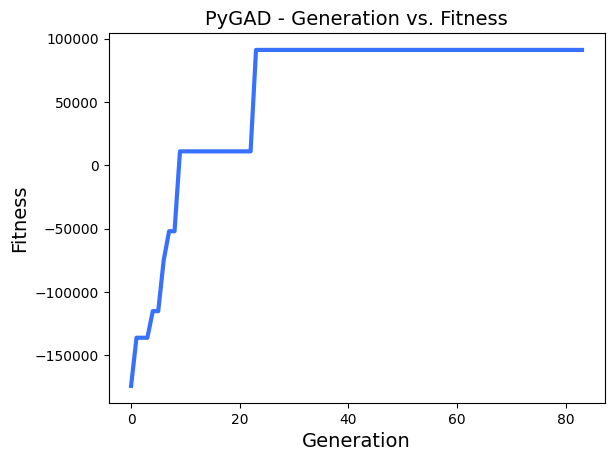

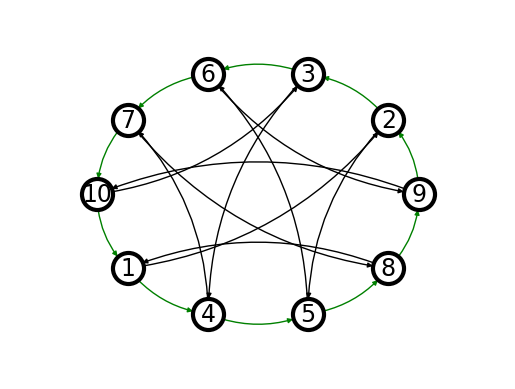

wrong_edges:  []
edges [(9, 2), (2, 3), (3, 6), (6, 7), (7, 10), (10, 1), (1, 4), (4, 5), (5, 8), (8, 9)]
solution:  (array([16.,  1., 14.,  5., 12.,  9., 10.,  3., 18.,  7.]), 91000, 0)
jest cykl


True

In [125]:
hamilton1(srednie[0],True)

Przykład działania pierwszego algorytmu:

**wrong_edges** - pokazuje następną krawędź jeżeli w rozwiązaniu wcześniejsza nie jest połączona.

**edges** - krawędzie, które występują w rozwiązaniu

**brak cyklu** - ostateczna ocena czy występuje cykl Hamiltona

Krawędzie są pokolorowane na 3 kolory. **Zielony** oznacza dobre krawędzie, **czerwone** to te należące do tablicy wrong_edges, czarne to pozostałe krawędzie należące nie uwzględnione w rozwiązaniu.

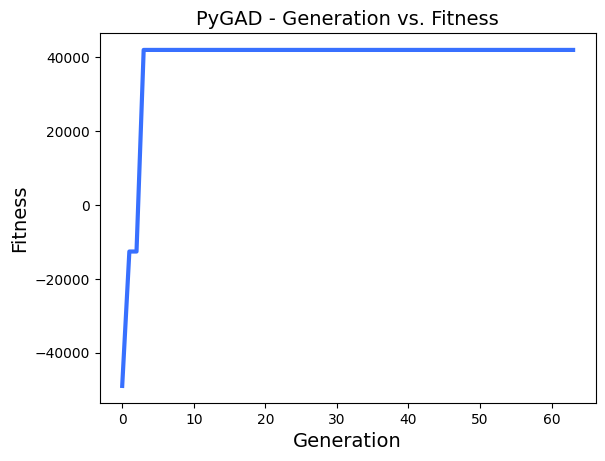

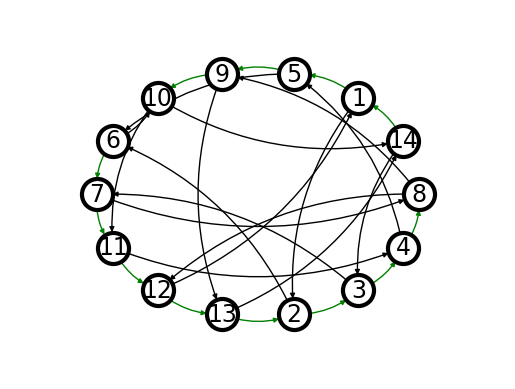

wrong edges:  [(10, 6)]
nodes:  [8, 14, 1, 5, 9, 10, 6, 7, 11, 12, 13, 2, 3, 4, 8]
solution:  (array([ 7., 13.,  0.,  4.,  8.,  9.,  5.,  6., 10., 11., 12.,  1.,  2.,
        3.]), 42000, 0)
brak cyklu


False

In [126]:
hamilton2(srednie[2],True)

## Wnioski
Dla małych i średnich grafów z cyklem hamiltona oba algorytmy są w stanie znaleźć rozwiązanie. W przypadku średnich grafów jest to mniej niż 30 % a w przypadku dużych w obu jest równe 0. Ciekawa sytuacja występuje przy grafach małych dla algorytmu drugiego gdzie wzrost jest bardzo duży bo aż o 36 punktów procentowych(domyślna konfiguracja) i 20 punktów w przypadku konfiguracji zmienionej. W konfiguracji alternatywnej gdzie jest mniej chromosomów w generacji wyniki były mniejsze (znacznie dla małych grafów i nieznacznie dla średnich),jednak czas wykonania drastycznie się zmniejszył.

Drugi algorytm (zarówno w konfiguracji alternatywne i domyślnej) działa znacznie efektywniej (w niektórych przypadkach nawet czasowo).Dodatkowo warto zauważyć, że przy odpowiedniej konfiguracji oba algorytmy mogą być jeszcze bardziej efektywne, zarówno czasowo jak i wynikowo.